# Analisis exploratorio de datos (EDA)

Importamos las librerias necesarias para el desarrollo del analisis exploratorio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

Importamos el dataset.

In [2]:
hechos = pd.read_excel('homicidios.xlsx')
victimas =pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

Ahora revisamos los datos

In [3]:
hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [4]:
victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


Realizamos un .info de los datasets

In [5]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Es un dataset con 696 registros y 21 columnas. Tambien se puede ver que hay datos nulos en las columnas de calle, altura, cruce, direcccion normalizada, victima y acusado.

In [6]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Es un dataset con 717 registros y 10 columnas. Tambien se puede ver que hay datos nulos en las columnas de rol, victima, sexo, edad y fecha_fallecimiento.

Al revisar el pdf de homicidios nos dice que en algunas columnas hay valores con SD los cuales son datos faltantes por lo que se procede a reemplazar estod SD por None.

In [7]:
hechos.replace('SD', None, inplace=True)
victimas.replace('SD', None, inplace=True)

Verificamos que se hayan realizado los cambios.

In [8]:
hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Revisamos cuantos datos nulos hay por columnas

In [9]:
hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   23
dtype: int64

Una vez realizado los cambios podemos ver que ademas de las columnas con datos faltantes anteriormente mencionadas tambien hay datos nulos en las columnas de hora, hh, lugar del hecho y calle.

In [10]:
victimas.isnull().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

Una vez hecho los cambios no se ven columnas adicionales que presenten datos nulos de las anteriormente identificadas. 

Teniendo en cuenta que hay muy pocos datos se decide trabajar con los datos nulos existentes.

Revisamos si hay datos duplicados.

In [11]:
hechos[hechos.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


En el dataframe de hechos no hay datos duplicados.

In [12]:
victimas[victimas.duplicated()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


En el dataframe de victimas no hay datos duplicados

Se eliminaran las columnas que no se utilizaran en el analisis exploratorio porque se considera que no aportaran informacion relevante para el analisis.

In [13]:
df_hechos = hechos.drop(columns = ['Altura', 'LUGAR_DEL_HECHO', 'Calle', 'Cruce',	'Dirección Normalizada', 'XY (CABA)', 'pos x',	
                               'pos y'])

In [14]:
df_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,MOTO-AUTO,MOTO,AUTO


In [15]:
df_victimas = victimas.drop(columns = ['FECHA_FALLECIMIENTO'])

Revisamos que se hayan realizado los cambios.

In [16]:
df_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


Procedemos a cambiar el tipo de datos para su posterior analisis.

In [17]:
df_hechos['AAAA'] = df_hechos['AAAA'].astype(str)
df_hechos['DD'] =df_hechos['DD'].astype(str)
df_hechos['MM'] =df_hechos['MM'].astype(str)
df_hechos['COMUNA'] =df_hechos['COMUNA'].astype(str)
df_hechos['N_VICTIMAS'] =df_hechos['N_VICTIMAS'].astype(str)

In [18]:
df_victimas['AAAA'] = df_victimas['AAAA'].astype(str)
df_victimas['DD'] =df_victimas['DD'].astype(str)
df_victimas['MM'] =df_victimas['MM'].astype(str)

Ahora hacemos un describe de las columas con tipo de dato object ya que en este dataframe no hay variables numericas.

In [19]:
df_hechos.describe(include=object)

,ID,N_VICTIMAS,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
count,696,696,696,696,696,695,695,696,696,696,687,673
unique,696,3,6,12,31,374,24,4,16,41,9,9
top,2016-0001,1,2016,12,20,16:00:00,7,AVENIDA,1,PEATON-PASAJEROS,MOTO,AUTO
freq,1,676,144,78,31,10,41,429,90,105,295,204


Vemos que el dataframe de hechos hay una mayor cantidad de accidentes con 1 sola victima, donde el mayor numero de victimas son motos y el mayor cantidad de victimarios son los autos. La comuna en la que suceden mas accidentes es la comuna 1 y estos accidentes con victimas mortales tienen una mayor frecuencia en el mes 12, en el dia 31, en el año 2016.

In [20]:
df_victimas.describe(include=object)

,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
count,717,717,717,717,706,708,711,664
unique,696,6,12,31,4,7,2,85
top,2017-0035,2018,12,20,CONDUCTOR,MOTO,MASCULINO,30
freq,3,149,81,32,330,303,545,28


En el dataset de victimas se puede ver que hay una mayor cantidad de victimas que se transportaban en moto, una mayor cantidad de victimas que eran conductores y la mayoria de las victimas tenian 30 años.

Ahora exportamos los datasets con los cambios ya realizados los cuales se utilizaran posteriormente.

In [37]:
df_hechos.to_excel('hechos.xlsx')
df_victimas.to_excel('victimas.xlsx')

Ahora importamos autoviz la cual es una libreria que nos da una serie de graficos a partir de un dataset

In [32]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

Primero comenzaremos en el dataset de hechos

Shape of your Data Set loaded: (696, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Removing ['HORA'] column(s) due to mixed data type detected...
    14 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0', 'ID', 'HORA']
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,695.000000,Possible ID colum: drop before modeling process.
ID,object,0.000000,100,nan,nan,"Possible ID colum: drop before modeling process., 696 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 696 unique values: Use hash encoding or embedding to reduce dimension."
N_VICTIMAS,int64,0.000000,0,1.000000,3.000000,has 20 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
FECHA,datetime64[ns],0.000000,85,nan,nan,No issue
AAAA,int64,0.000000,0,2016.000000,2021.000000,has a high correlation with ['Unnamed: 0']. Consider dropping one of them.
MM,int64,0.000000,1,1.000000,12.000000,No issue
DD,int64,0.000000,4,1.000000,31.000000,No issue
HORA,object,0.143678,46,nan,nan,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., 308 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 3 different data types: object, float,, high cardinality with 324 unique values: Use hash encoding or embedding to reduce dimension."
HH,float64,0.143678,NA,0.000000,23.000000,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123."
TIPO_DE_CALLE,object,0.000000,0,nan,nan,No issue


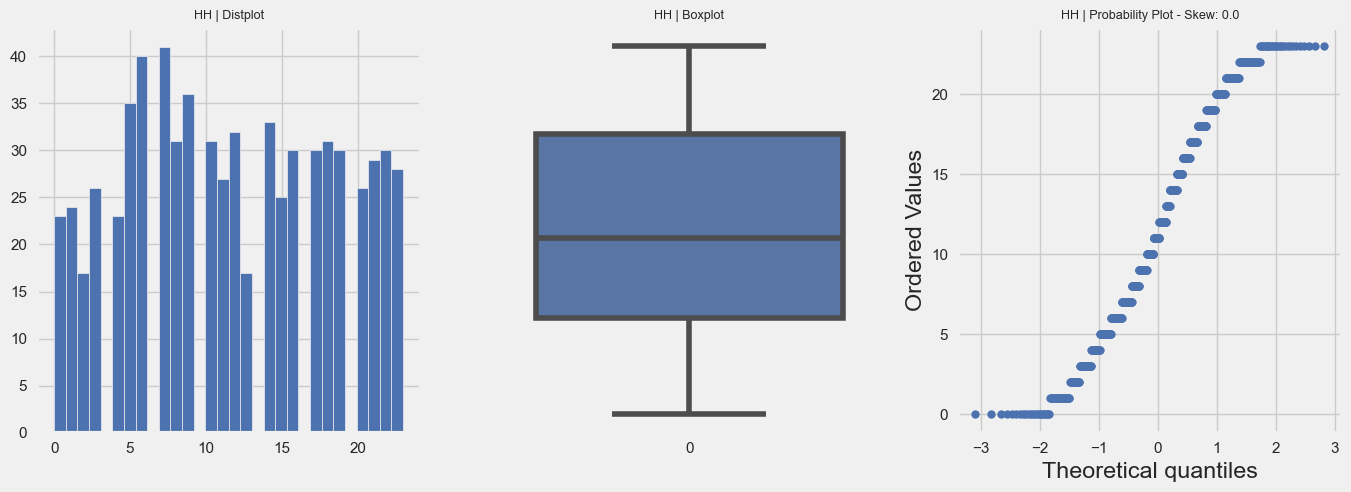

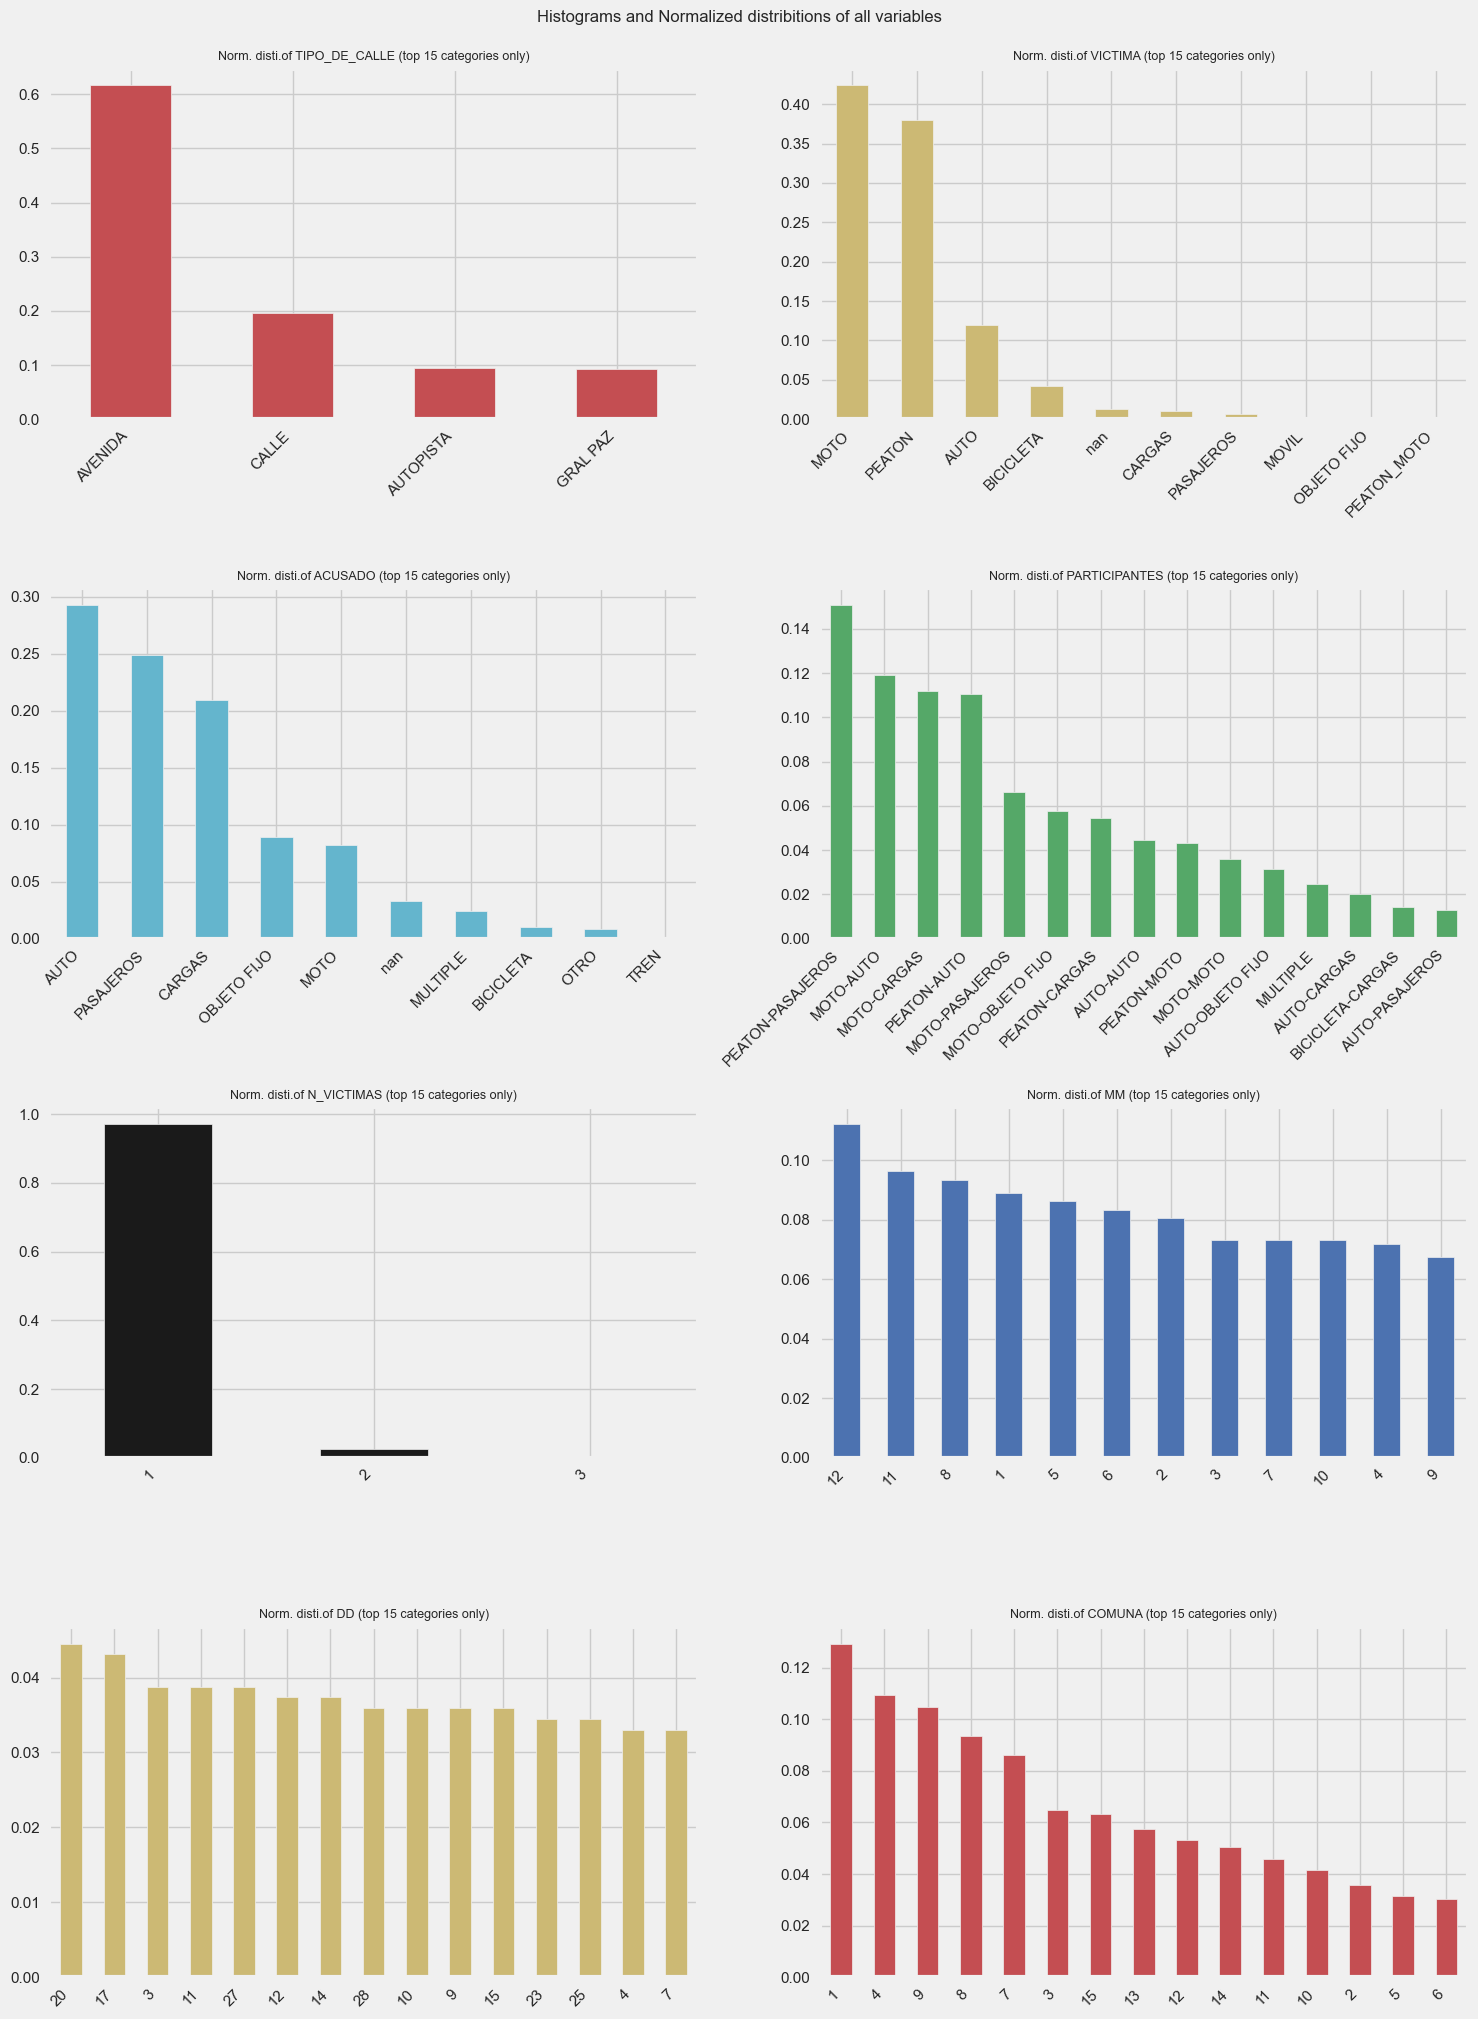

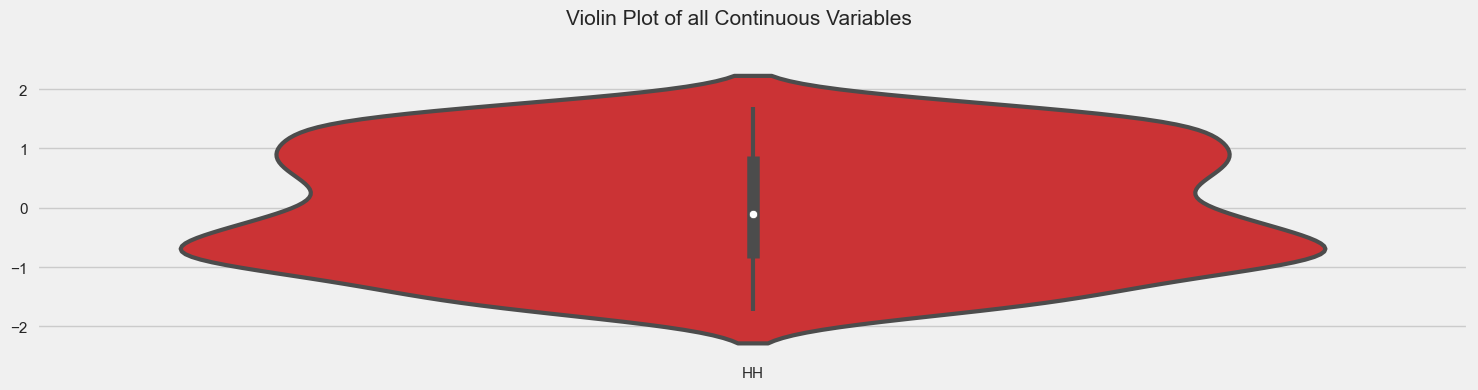

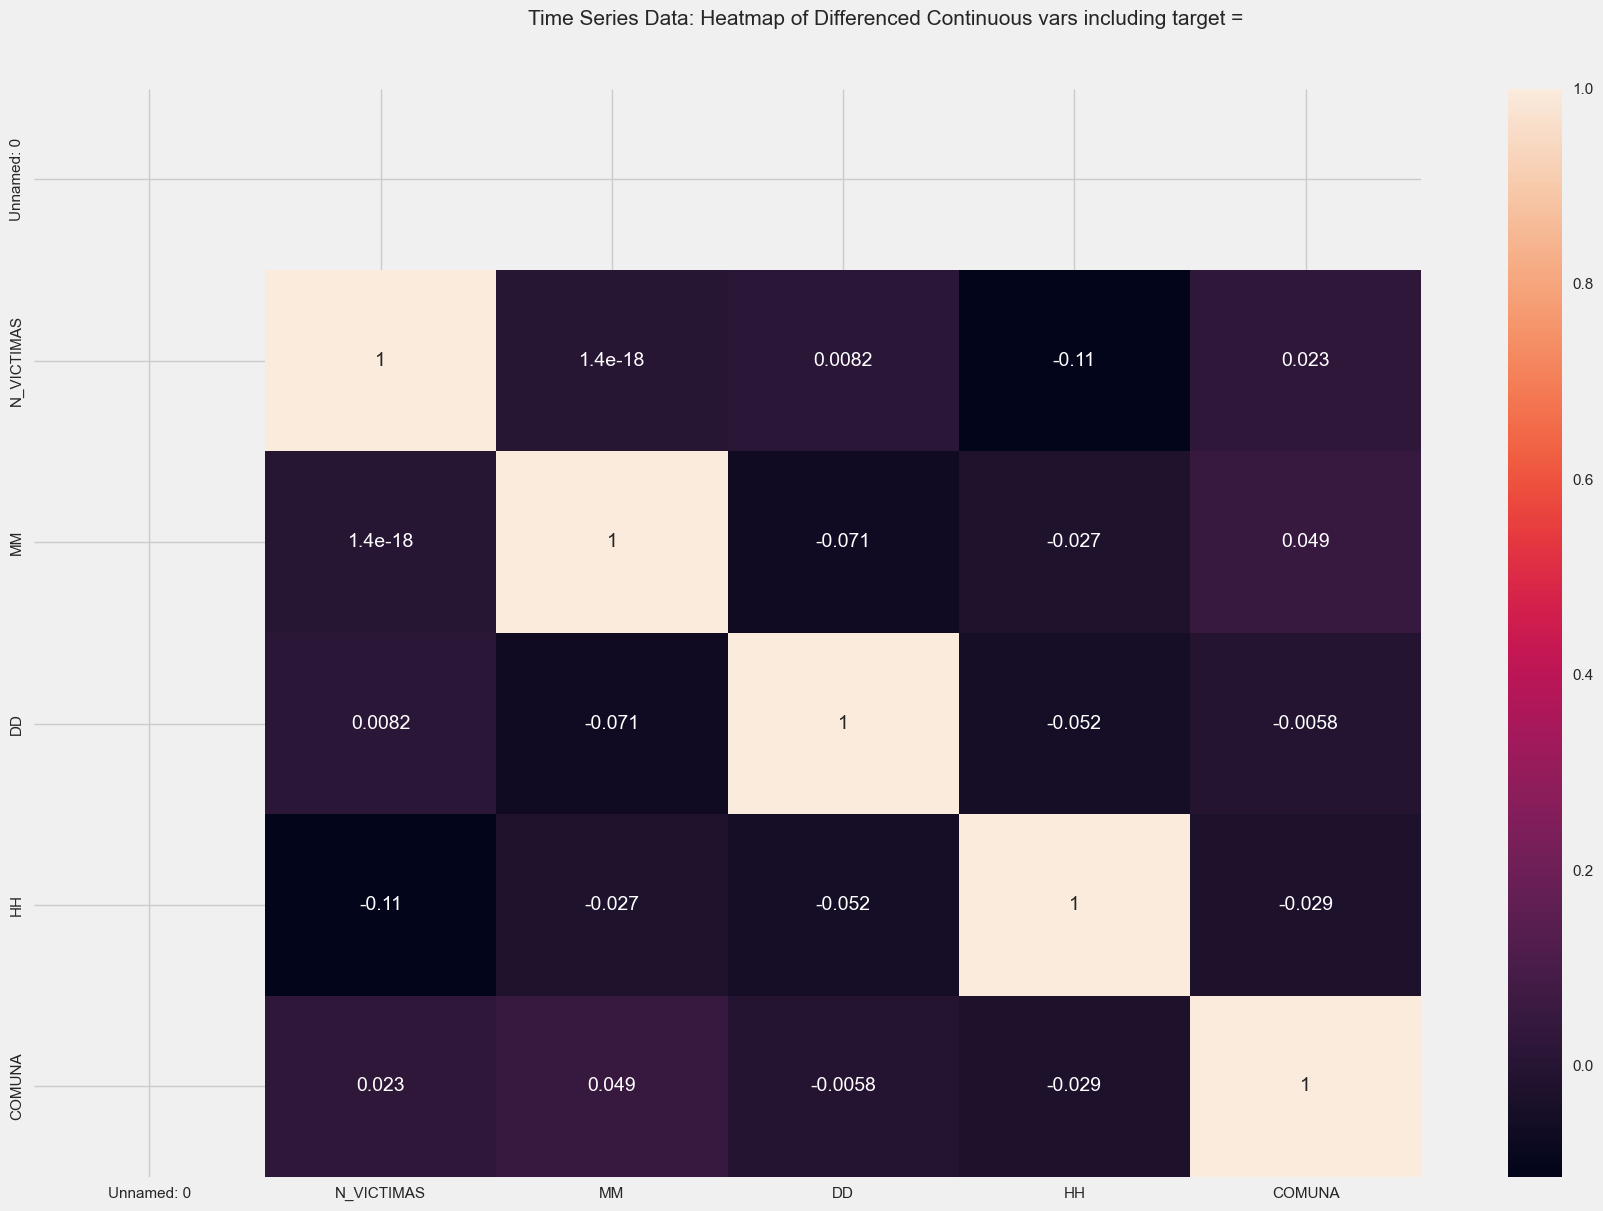

<Figure size 1500x0 with 0 Axes>

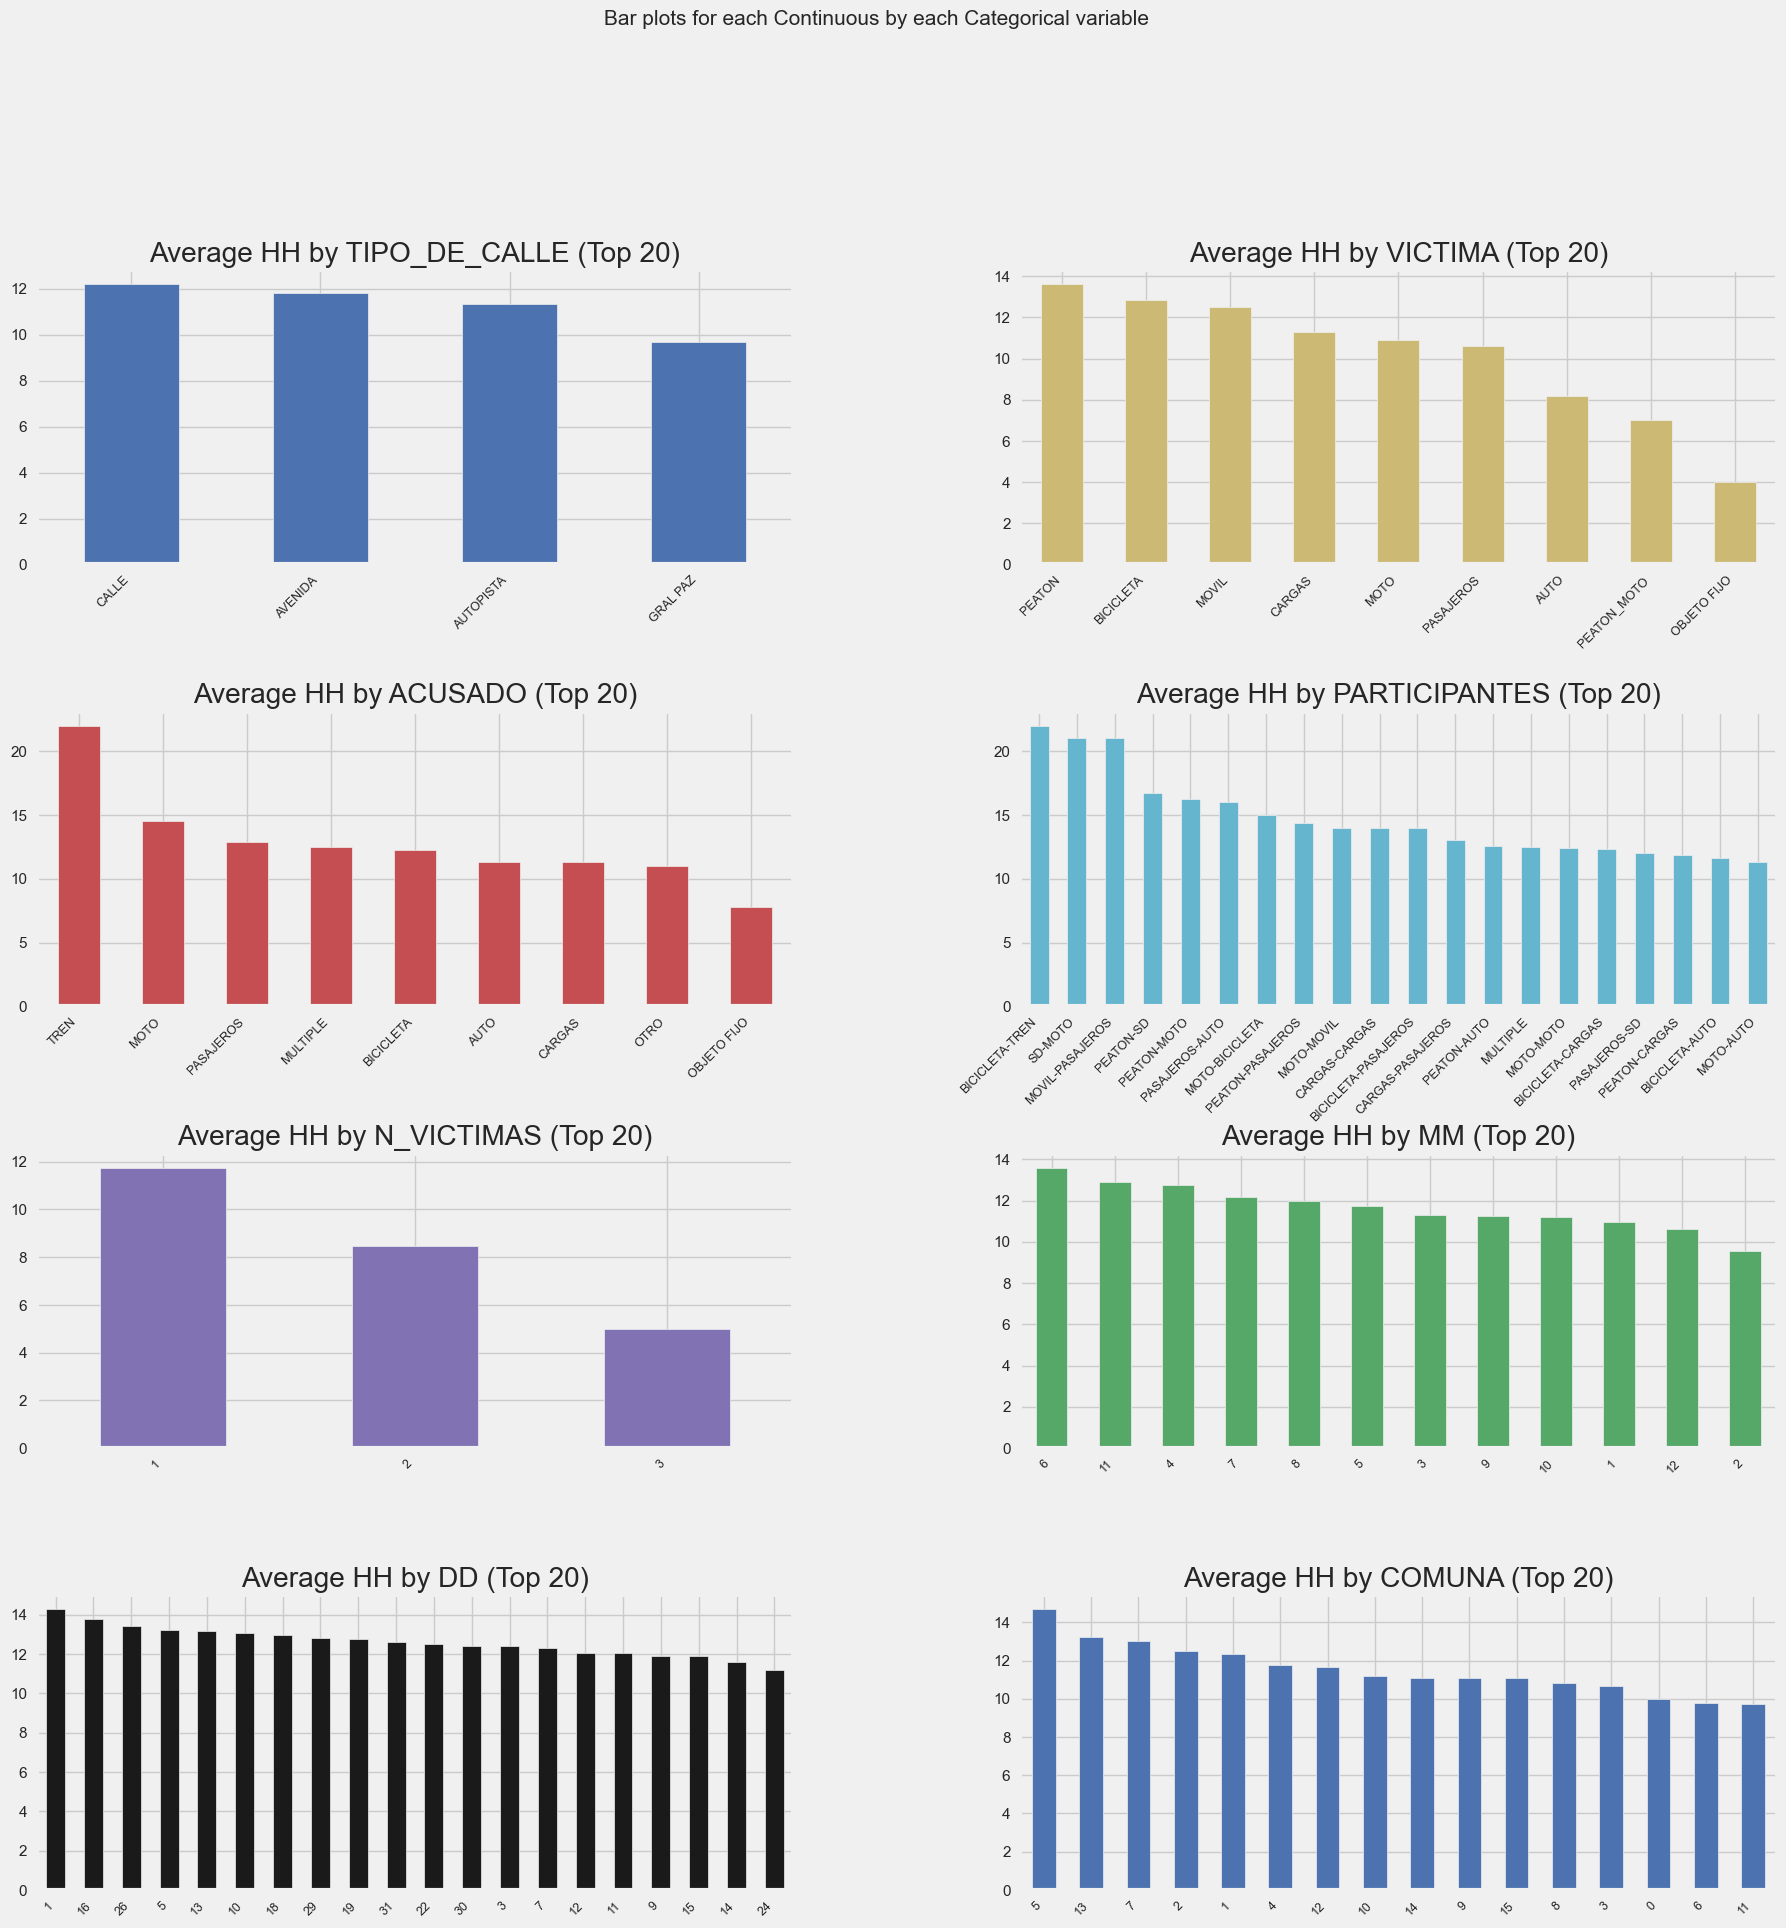

All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [38]:
AV = AutoViz_Class()
report = AV.AutoViz('hechos.xlsx')


**Conclusiones de graficos del dataset de hechos**
- Vemos que la franja horaria no presenta outliers, no tiene mucha variacion y ocurrieron mas accidentes durante las 5 y 10 horas aproximadamente.
- El tipo de calle avenidas es donde se presenta una mayor cantidad de accidentes con victimas mortales.
- Hay una mayor cantidad de victimas de tipo moto y peaton.
- Los causantes de estos accidentes en su mayoria son autos, pasajeros y cargas.
- Estos accidentes en su mayoria solo tuvieron una victima mortal.
- Hay una mayor cantidad de accidentes con victimas mortales en los meses 11 y 12.
- La comuna en la cual ocurren mas accidentes es la 1.
- Las columnas del dataset hechos no estan correlacionadas.

Shape of your Data Set loaded: (717, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    10 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,716.000000,Possible ID colum: drop before modeling process.
ID_hecho,object,0.000000,97,nan,nan,"696 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 696 unique values: Use hash encoding or embedding to reduce dimension."
FECHA,datetime64[ns],0.000000,83,nan,nan,No issue
AAAA,int64,0.000000,0,2016.000000,2021.000000,has a high correlation with ['Unnamed: 0']. Consider dropping one of them.
MM,int64,0.000000,1,1.000000,12.000000,No issue
DD,int64,0.000000,4,1.000000,31.000000,No issue
ROL,object,1.534170,0,nan,nan,"11 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
VICTIMA,object,1.255230,0,nan,nan,"9 missing values. Impute them with mean, median, mode, or a constant value such as 123., 3 rare categories: ['CARGAS', 'PASAJEROS', 'MOVIL']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
SEXO,object,0.836820,0,nan,nan,"6 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
EDAD,float64,7.391911,NA,1.000000,95.000000,"53 missing values. Impute them with mean, median, mode, or a constant value such as 123."


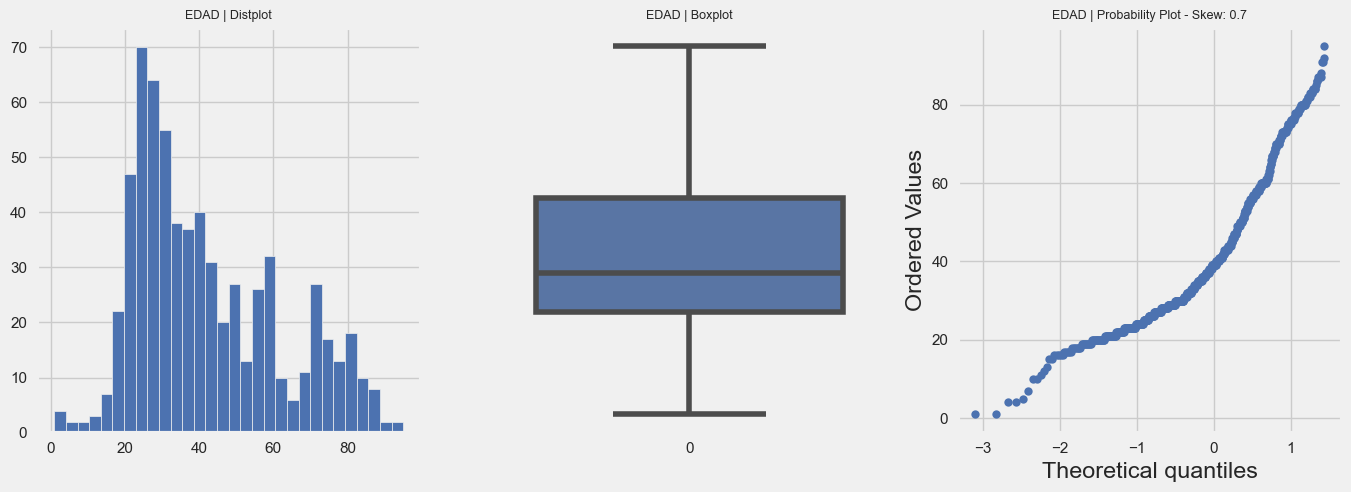

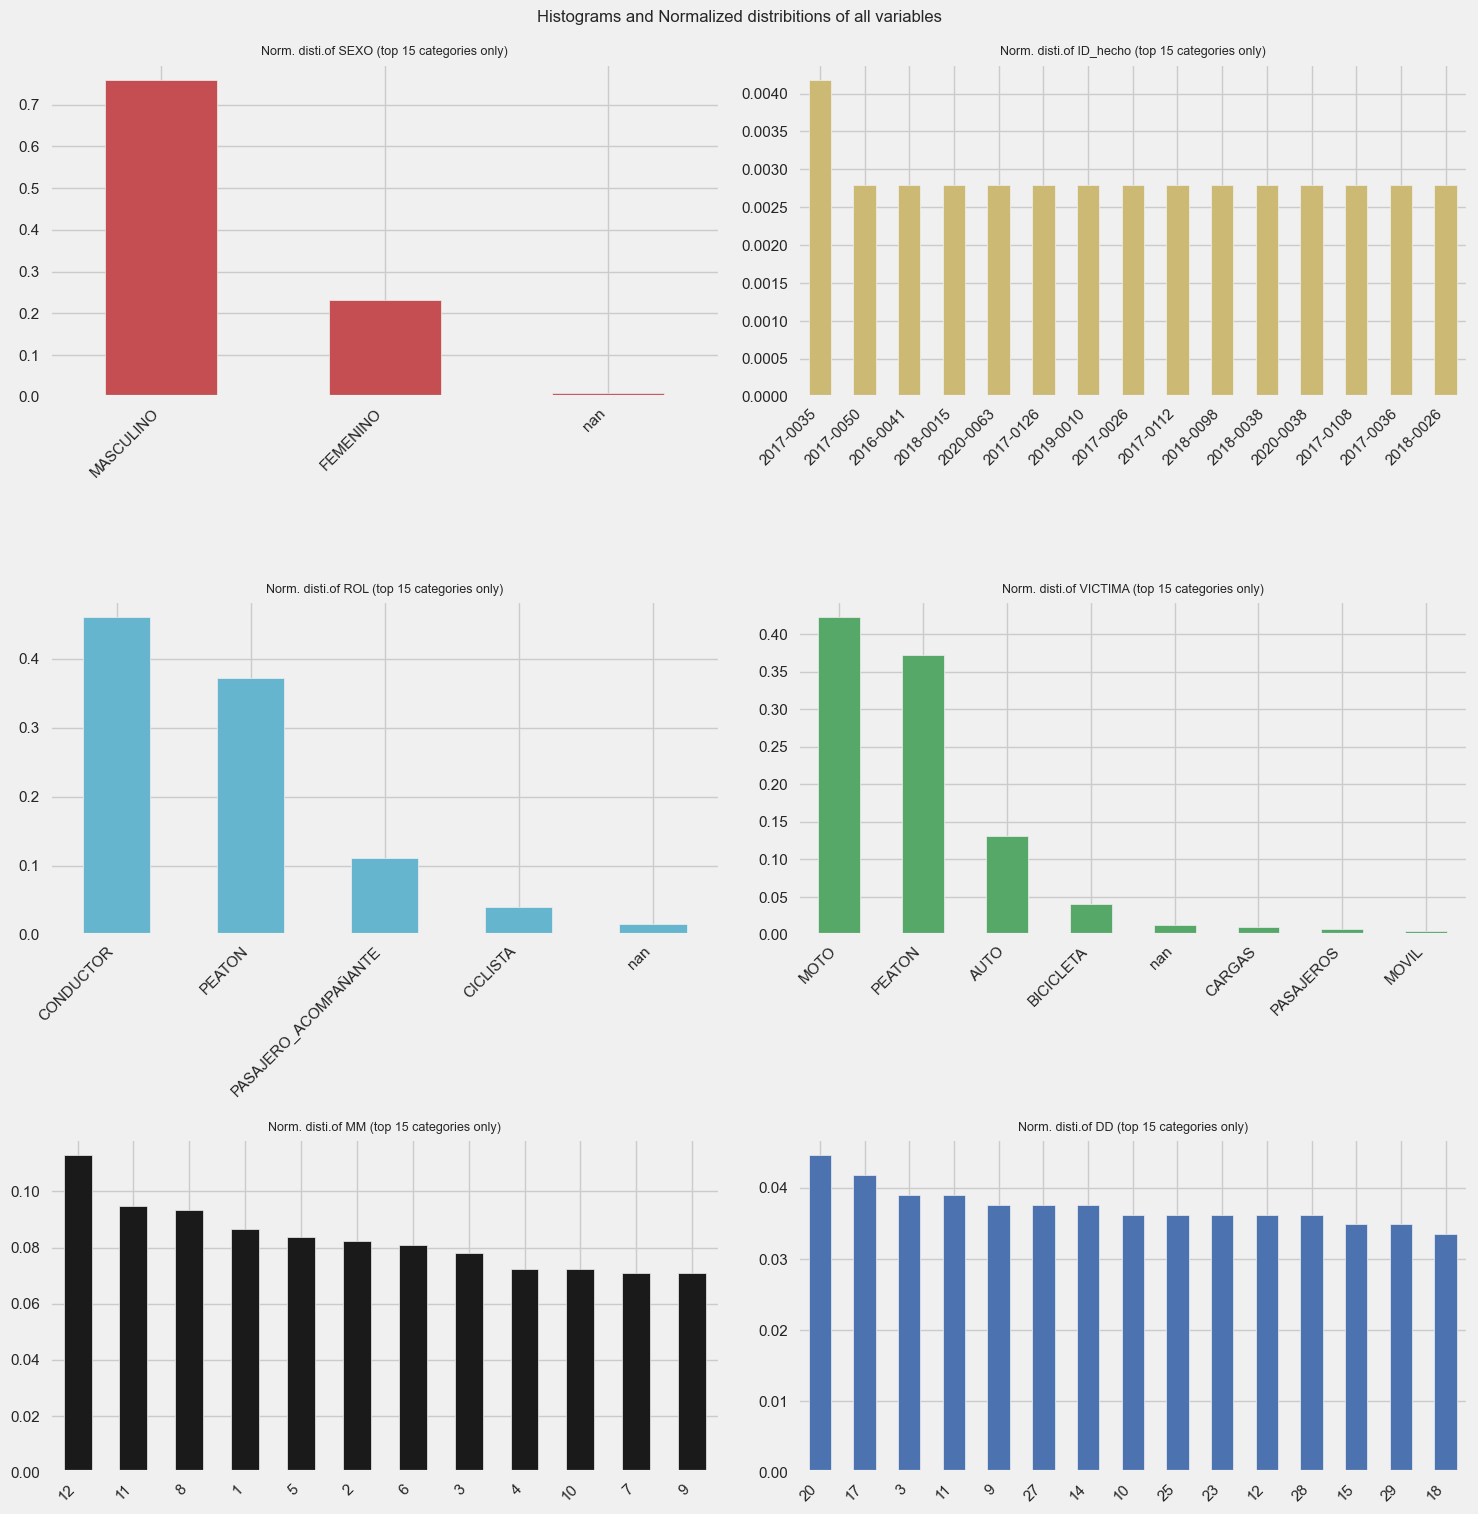

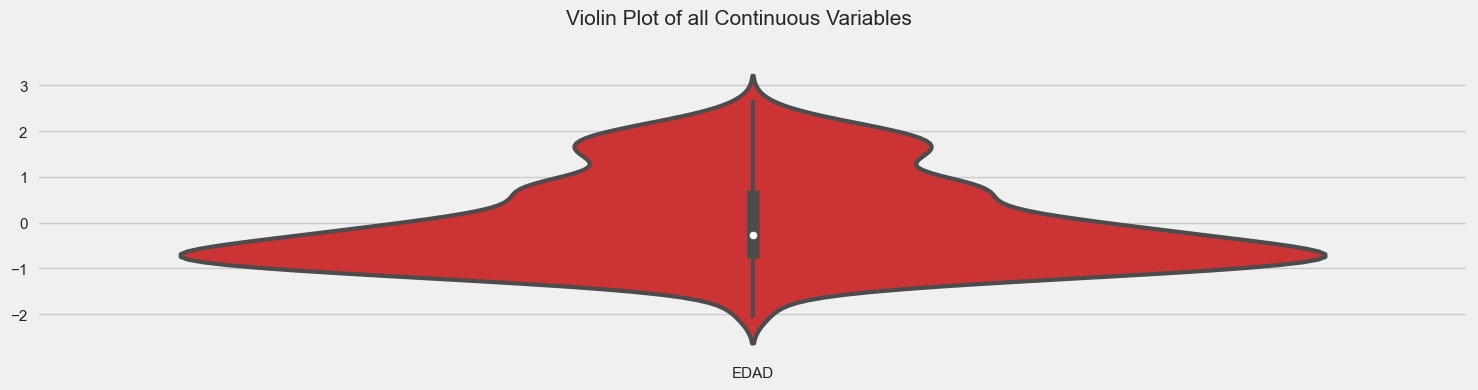

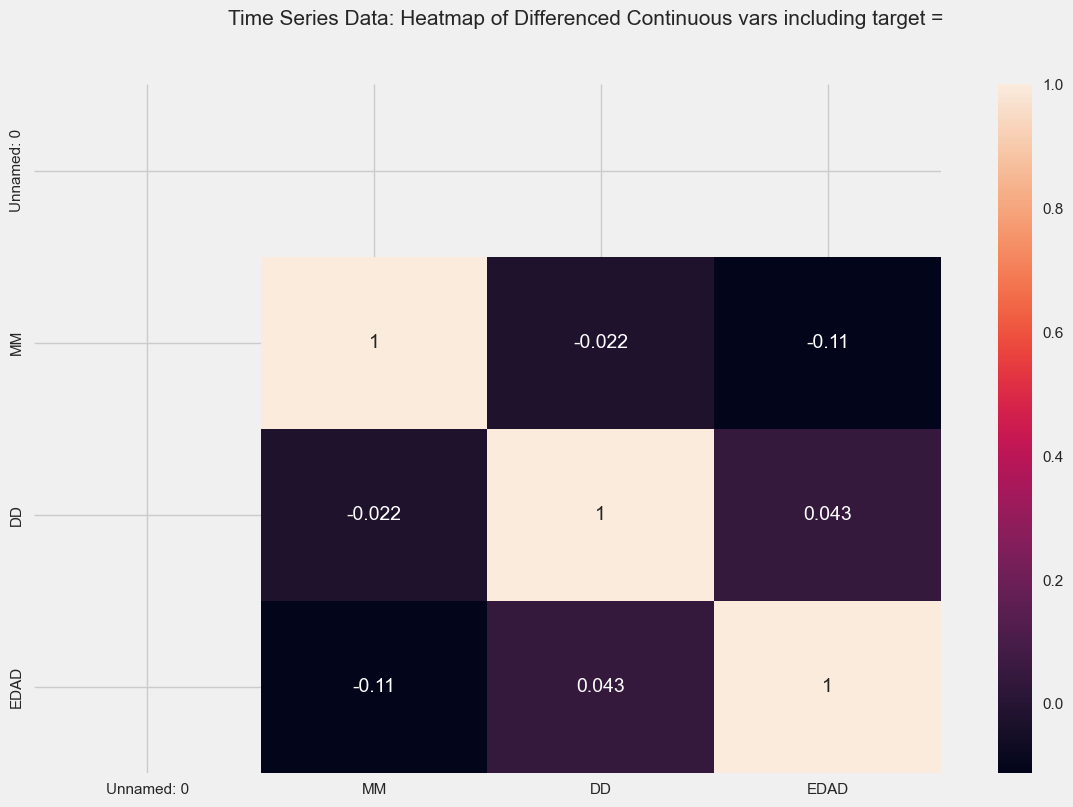

<Figure size 1500x0 with 0 Axes>

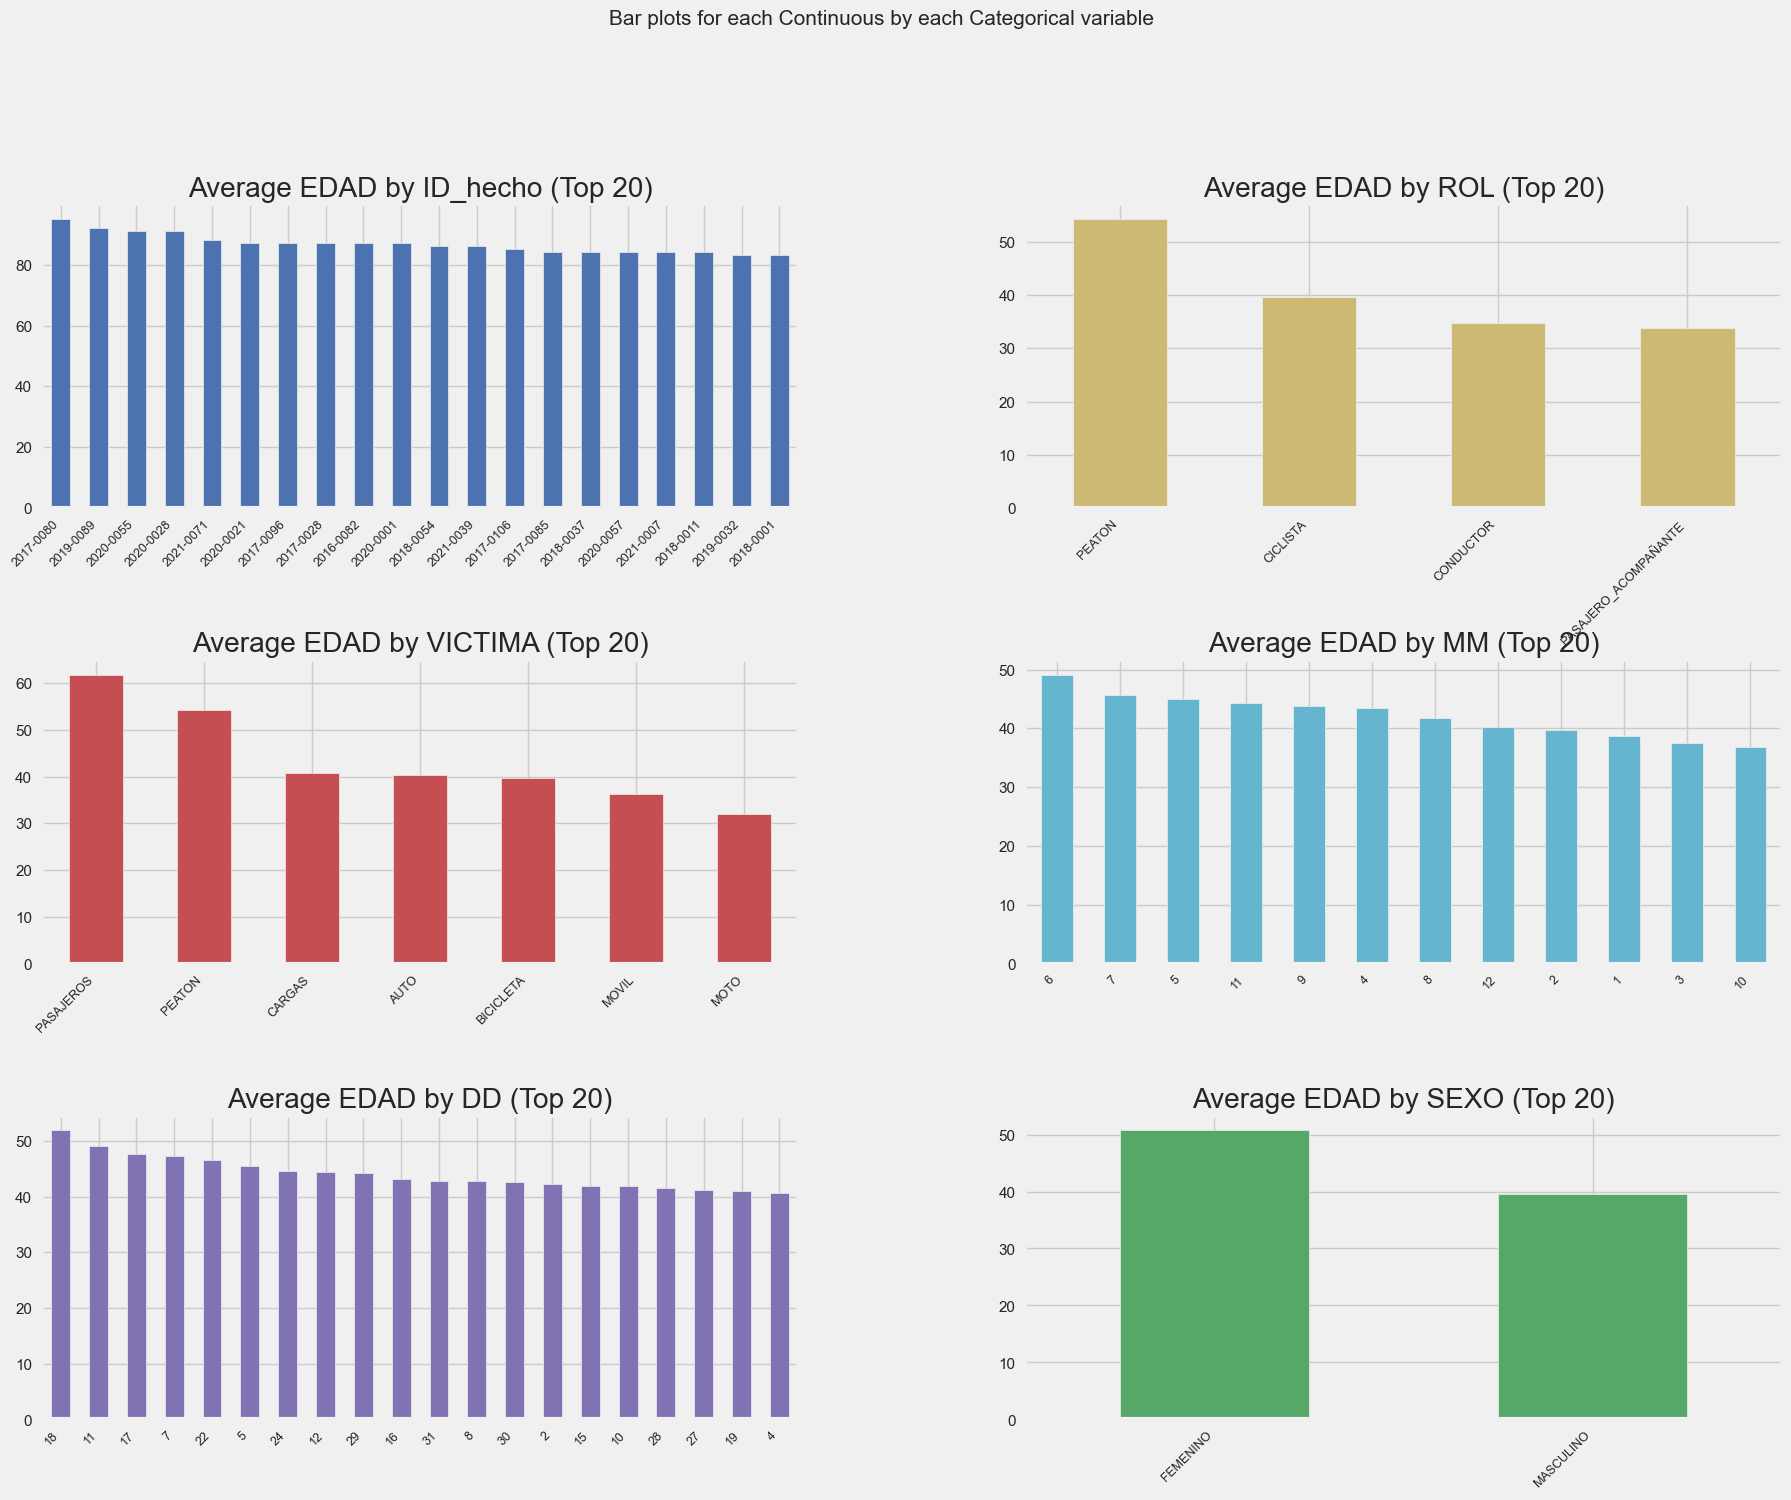

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [39]:
AV = AutoViz_Class()
report = AV.AutoViz('victimas.xlsx')

**Conclusiones de graficos del dataset de victimas**
- Vemos que la edad no presenta outliers, no tiene mucha variacion y muchas de las victimas fatales se ecuentran entre los 20 y 50 años aproximadamente.
- Muchas de las victimas mortales son hombres.
- Hay una mayor cantidad de victimas de tipo moto y peaton.
- Las mayoria de victimas eran conductores o peatones.
- Las columnas del dataset hechos no estan correlacionadas.